In [1]:
import pyplume as pl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from time import time

In [2]:
inputname = 'namelist.input.txt'
p1_metadata = pl.plume_metadata(inputname)
D  = p1_metadata.D
dt = p1_metadata.dt
Ta = p1_metadata.Ta
g  = p1_metadata.g
nu  = p1_metadata.nu
threshold = p1_metadata.threshold

In [3]:
#Path to data folder
folder = r'C:\Users\thanh\OneDrive - University of Texas at San Antonio\Data\nlb.HF.CO2.h.5.0\instantaneous'

In [4]:
# Combining all CSV files into one matfile 
# You only do this once
# Take long time about 1h
nx = 57
start = time()
pl.hf_csv2mat(folder,"QP",nx)
pl.hf_csv2mat(folder,"PR",nx)
pl.hf_csv2mat(folder,"TH",nx)
pl.hf_csv2mat(folder,"UU",nx)
pl.hf_csv2mat(folder,"VV",nx)
pl.hf_csv2mat(folder,"WW",nx)
end = time()
print((end-start)/60)

In [5]:
def hf_contour(data,interface,dx,dz,D,threshold,title):
    import numpy as np
    import matplotlib.pyplot as plt
    data = data.T
    interface = interface.T
    nz,nx = np.shape(data)
    plt.style.use('seaborn-white')
    xi = np.linspace(-nx*.5*dx/D, nx*.5*dx/D, nx)
    zi = np.linspace(0, nz*dz/D, nz)
    plt.figure(figsize=(10, 10))
    contours  = plt.contour(xi,zi,interface,linewidths=0.1, colors='black');
#     plt.clabel(contours, inline=True, fontsize=15)
    plt.ylabel("$z/D$",fontsize=14)
    plt.xlabel("$x/D$", rotation=0, fontsize=14, labelpad=10)
#     plt.title(title,fontsize=18,pad = 20)
    plt.imshow(data, extent=[-nx*.5*dx/D, nx*.5*dx/D,0, nz*dz/D], origin='lower',cmap='jet',alpha=1,aspect='auto')
    plt.colorbar()
#     plt.savefig(title+".png")

In [6]:
# Loading matfiles
start = time()
U = pl.hf_loadmat(folder+"\\UU")
V = pl.hf_loadmat(folder+"\\VV")
W = pl.hf_loadmat(folder+"\\WW")
T = pl.hf_loadmat(folder+"\\TH")
end = time()
print((end-start)/60)

0.5007673462231954


In [7]:
nx,nz,nt = np.shape(T)
print(nx,nz)

57 701


In [8]:
# Creating a object called hf_profile1
# Around 15 mins
start = time()

hf_profile1 = pl.high_frequency_profile(T,U,V,W,nx,nz,D,Ta,g,threshold)

end = time()
print("Minutes: ",round((end-start)/60,2))

Minutes:  12.81


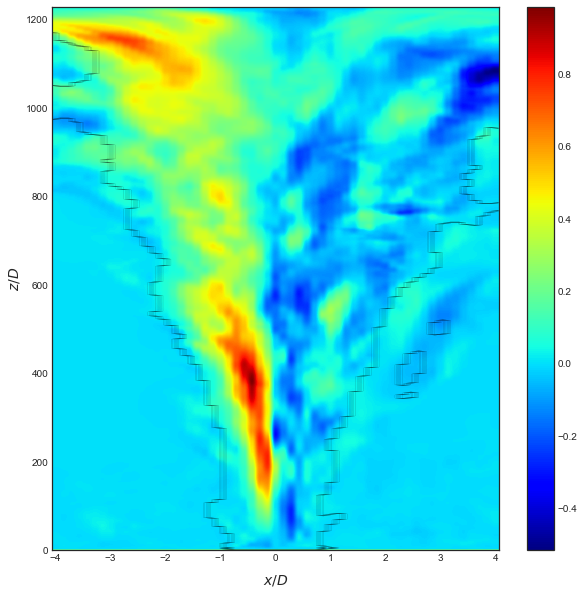

In [9]:
# Contour Plot 
plotdata = hf_profile1.Re_stress_UW
hf_contour(plotdata,hf_profile1.interface,nx,nz,D,threshold,"Reynolds Stress UW")

In [10]:
# Tesiting out Centerline plot
centerline = int((nx-1)/2)
testcenter = hf_profile1.Re_stress_UU[centerline,:]
plt.plot(testcenterline)

NameError: name 'testcenterline' is not defined